# Lab | Imbalanced data


## Instructions

1. Load the dataset and explore the variables.
2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
3. Extract the target variable.
4. Extract the independent variables and scale them.
5. Build the logistic regression model.
6. Evaluate the model.
7. Even a simple model will give us more than 70% accuracy. Why?
8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score

## 1. Load the dataset and explore the variables.


In [4]:
data = pd.read_csv("customer_churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen, MonthlyCharges.

In [6]:
print(data["Churn"].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


In [7]:
print(data["tenure"].value_counts())

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


In [8]:
print(data["SeniorCitizen"].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


In [9]:
print(data["MonthlyCharges"].value_counts())

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64


In [10]:
print(data.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## 3. Extract the target variable.

In [12]:
y = data["Churn"]

## 4. Extract the independent variables and scale them.

In [45]:
x = data[["tenure", "SeniorCitizen", "MonthlyCharges"]]
x


,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 25)


<AxesSubplot:>

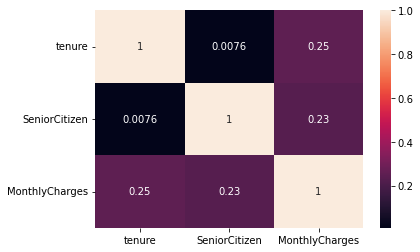

In [47]:
sns.heatmap(x_train.corr(), annot = True)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

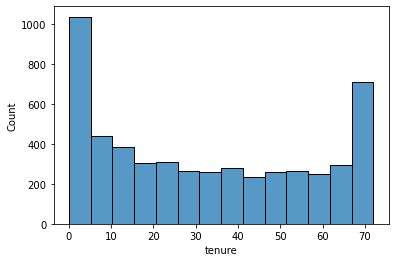

In [56]:
fig, axs = plt.subplots(1,1)
sns.histplot(x_train["tenure"])
#sns.histplot(x_train["SeniorCitizen"], ax= axs[1])
#sns.histplot(x_train["MonthlyCharges"], ax= axs[2])

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Count'>

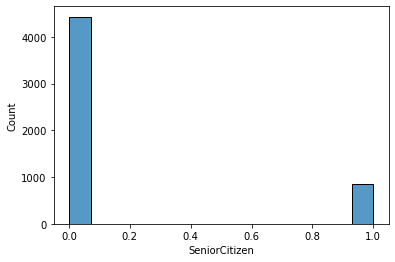

In [57]:
fig, axs = plt.subplots(1,1)
sns.histplot(x_train["SeniorCitizen"])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

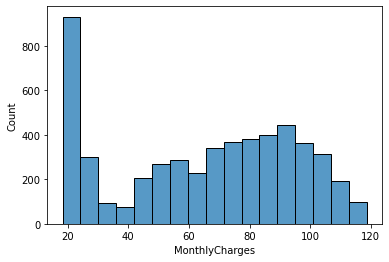

In [58]:
fig, axs = plt.subplots(1,1)
sns.histplot(x_train["MonthlyCharges"])

In [59]:
sc = StandardScaler().fit(x_train)

x_train_sc = sc.transform(x_train)
x_train_sc = pd.DataFrame(x_train_sc, index = x_train.index, columns = x_train.columns)

x_train_sc

,tenure,SeniorCitizen,MonthlyCharges
5802,0.392457,-0.438242,-0.507295
168,1.043359,2.281845,-0.648306
4426,-0.665258,-0.438242,0.486418
1645,0.392457,2.281845,0.657290
2082,-0.461851,-0.438242,-1.331795
...,...,...,...
2934,-0.827983,-0.438242,-1.507644
2191,-1.275478,2.281845,0.877931
6618,-0.258444,-0.438242,0.723648
318,-0.339807,2.281845,0.939312


In [60]:
x_test_sc = sc.transform(x_test)
x_test_sc = pd.DataFrame(x_test_sc, index = x_test.index, columns = x_test.columns)

x_test_sc

,tenure,SeniorCitizen,MonthlyCharges
4864,1.572216,-0.438242,1.602893
5033,-1.275478,-0.438242,-1.507644
2671,1.246766,-0.438242,1.345755
3919,-1.072071,-0.438242,0.952584
3630,-1.153434,-0.438242,-1.456216
...,...,...,...
5145,1.368810,-0.438242,-1.298616
5302,-0.909346,-0.438242,0.021911
7027,-0.787302,-0.438242,0.282367
3402,-1.153434,-0.438242,0.799960


## 5. Build the logistic regression model.

In [61]:
lr1 = LogisticRegression(random_state = 25, solver = "lbfgs", multi_class = "ovr").fit(x_train_sc, y_train)
y_train_pred1 = lr1.predict(x_train_sc)
y_test_pred1 = lr1.predict(x_test_sc)

## 6. Evaluate the model.

In [69]:
print("The Accuracy in the TRAIN set is: {:.3f}".format(accuracy_score(y_train, y_train_pred1)))
print("The Accuracy in the TEST set is: {:.3f}".format(accuracy_score(y_test, y_test_pred1)))
print(" ")
print("The Precision in the TRAIN set is: {:.3f}".format(precision_score(y_train, y_train_pred1, pos_label="No")))
print("The Precision in the TEST set is: {:.3f}".format(precision_score(y_test, y_test_pred1, pos_label="No")))
print(" ")
print("The Recall in the TRAIN set is: {:.3f}".format(recall_score(y_train, y_train_pred1, pos_label="No")))
print("The Recall in the TEST set is: {:.3f}".format(recall_score(y_test,  y_test_pred1, pos_label="No")))
print(" ")
print("The F1 for the TRAIN set is {:.2f}".format(f1_score(y_train,y_train_pred1, pos_label="No")))
print("The F1 for the TEST set is {:.2f}".format(f1_score(y_test,y_test_pred1, pos_label="No")))
print(" ")
print("The Kappa for the TRAIN set is {:.2f}".format(cohen_kappa_score(y_train, y_train_pred1)))
print("The Kappa for the TEST set is {:.2f}".format(cohen_kappa_score(y_test, y_test_pred1)))

The Accuracy in the TRAIN set is: 0.793
The Accuracy in the TEST set is: 0.788
 
The Precision in the TRAIN set is: 0.823
The Precision in the TEST set is: 0.813
 
The Recall in the TRAIN set is: 0.916
The Recall in the TEST set is: 0.920
 
The F1 for the TRAIN set is 0.87
The F1 for the TEST set is 0.86
 
The Kappa for the TRAIN set is 0.41
The Kappa for the TEST set is 0.40


In [91]:
cm_train= confusion_matrix(y_train, y_train_pred1)
disp = ConfusionMatrixDisplay(cm_train,display_labels=lr1.classes_);


disp.plot

<bound method ConfusionMatrixDisplay.plot of <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fef33f7be80>>

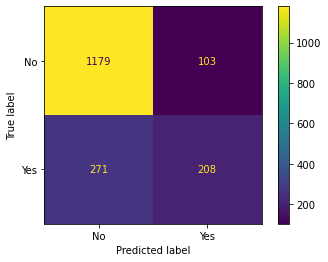

In [83]:
cm_test = confusion_matrix(y_test, y_test_pred1)
disp = ConfusionMatrixDisplay(cm_test,display_labels=lr1.classes_);

disp.plot()

## 7. Even a simple model will give us more than 70% accuracy. Why?

Accuracy is higher than 70% due to class imbalance.

## 8. Synthetic Minority Oversampling TEchnique (SMOTE)

In [72]:
sm = SMOTE(random_state = 25, k_neighbors =4)

x_train_sc_smote, y_train_smote = sm.fit_resample(x_train_sc, y_train)

In [73]:
lr2 = LogisticRegression(random_state = 25, solver = "lbfgs", multi_class = "ovr").fit(x_train_sc_smote, y_train_smote)

y_train_pred2 = lr2.predict(x_train_sc_smote)
y_test_pred2 = lr2.predict(x_test_sc)

In [81]:
print("The Accuracy in the TRAIN set is: {:.3f}".format(accuracy_score(y_train_smote, y_train_pred2)))
print("The Accuracy in the TEST set is: {:.3f}".format(accuracy_score(y_test, y_test_pred2)))
print("")
print("The Precision in the TRAIN set is: {:.3f}".format(precision_score(y_train_smote, y_train_pred2, pos_label="No")))
print("The Precision in the TEST set is: {:.3f}".format(precision_score(y_test, y_test_pred2, pos_label="No")))
print("")
print("The Recall in the TRAIN set is: {:.3f}".format(recall_score(y_train_smote, y_train_pred2, pos_label="No")))
print("The Recall in the TEST set is: {:.3f}".format(recall_score(y_test,  y_test_pred2, pos_label="No")))
print("")
print("The F1 for the TRAIN set is {:.2f}".format(f1_score(y_train_smote,y_train_pred2, pos_label="No")))
print("The F1 for the TEST set is {:.2f}".format(f1_score(y_test,y_test_pred2, pos_label="No")))
print("")
print("The Kappa for the TRAIN set is {:.2f}".format(cohen_kappa_score(y_train_smote, y_train_pred2)))
print("The Kappa for the TEST set is {:.2f}".format(cohen_kappa_score(y_test, y_test_pred2)))

The Accuracy in the TRAIN set is: 0.731
The Accuracy in the TEST set is: 0.731

The Precision in the TRAIN set is: 0.735
The Precision in the TEST set is: 0.881

The Recall in the TRAIN set is: 0.722
The Recall in the TEST set is: 0.730

The F1 for the TRAIN set is 0.73
The F1 for the TEST set is 0.80

The Kappa for the TRAIN set is 0.46
The Kappa for the TEST set is 0.41


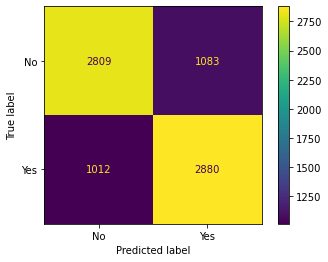

In [78]:
cm_train2 = confusion_matrix(y_train_smote, y_train_pred2)
disp = ConfusionMatrixDisplay(cm_train2,display_labels=lr2.classes_);

disp.plot()

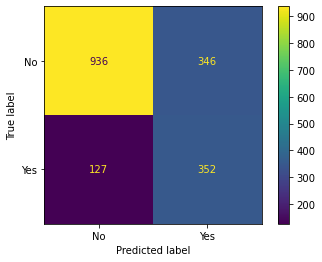

In [79]:
cm_test2 = confusion_matrix(y_test, y_test_pred2)
disp = ConfusionMatrixDisplay(cm_test2,display_labels=lr2.classes_);

disp.plot()

## Comparison

In [86]:
#Comparing Accuracy: before and after SMOTE
print("The Accuracy in the FIRST TEST set is: {:.3f}".format(accuracy_score(y_test, y_test_pred1)))
print("The Accuracy in the SECOND TEST set is: {:.3f}".format(accuracy_score(y_test, y_test_pred2)))
print("")
#Comparing Precision: before and after SMOTE
print("The Precision in the FIRST TEST  set is: {:.3f}".format(precision_score(y_test, y_test_pred1, pos_label="No")))
print("The Precision in the SECOND TEST  set is: {:.3f}".format(precision_score(y_test, y_test_pred2, pos_label="No")))
print("")
#Comparing Recall: before and after SMOTE
print("The Recall in the FIRST TEST set is: {:.3f}".format(recall_score(y_test,  y_test_pred1, pos_label="No")))
print("The Recall in the SECOND TEST set is: {:.3f}".format(recall_score(y_test,  y_test_pred2, pos_label="No")))
print("")
#Comparing F1: before and after SMOTE
print("The F1 for the FIRST TEST set is {:.2f}".format(f1_score(y_test,y_test_pred1, pos_label="No")))
print("The F1 for the SECOND TEST set is {:.2f}".format(f1_score(y_test,y_test_pred2, pos_label="No")))
print("")
#Comparing Kappa: before and after SMOTE
print("The Kappa for the FIRST TEST set is {:.2f}".format(cohen_kappa_score(y_test, y_test_pred1)))
print("The Kappa for the SECOND TEST set is {:.2f}".format(cohen_kappa_score(y_test, y_test_pred2)))

The Accuracy in the FIRST TEST set is: 0.788
The Accuracy in the SECOND TEST set is: 0.731

The Precision in the FIRST TEST  set is: 0.813
The Precision in the SECOND TEST  set is: 0.881

The Recall in the FIRST TEST set is: 0.920
The Recall in the SECOND TEST set is: 0.730

The F1 for the FIRST TEST set is 0.86
The F1 for the SECOND TEST set is 0.80

The Kappa for the FIRST TEST set is 0.40
The Kappa for the SECOND TEST set is 0.41
